<a href="https://colab.research.google.com/github/ismailolatunji/Income-Segmentation_Project/blob/main/IncomeSegment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

### **Loading the Dataset**

In [2]:
df = pd.read_csv('/content/income.csv')

### **Data Overview**

In [3]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [4]:
df.columns

Index(['Name', 'Age', 'Income($)'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       22 non-null     object
 1   Age        22 non-null     int64 
 2   Income($)  22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 660.0+ bytes


In [6]:
df.shape

(22, 3)

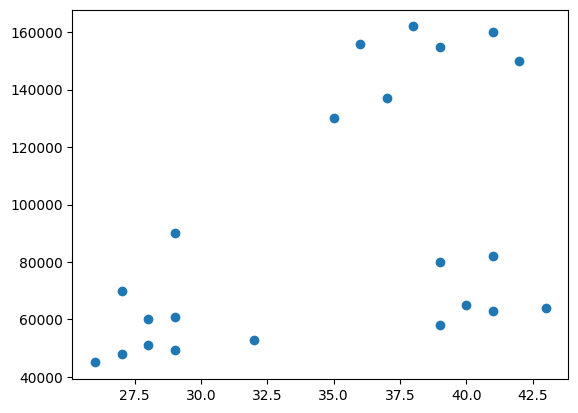

In [7]:
plt.scatter(data = df, x = 'Age', y = 'Income($)')

### **Applying KMeans Clustering**

In [8]:
km = KMeans(n_clusters = 3)
km.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 'auto',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [9]:
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

array([0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [10]:
df['cluster'] = y_predicted

In [11]:
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


### **Visualizing Clusters**

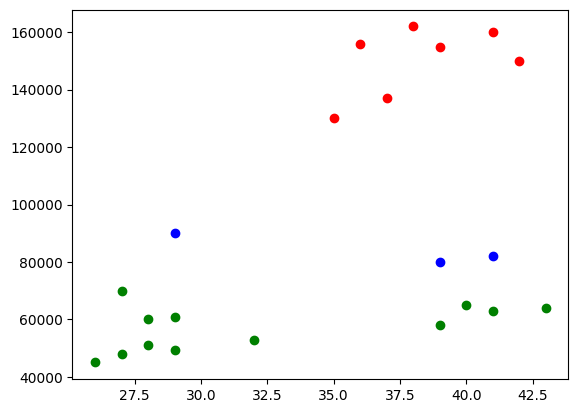

In [12]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1['Age'], df1['Income($)'], color = 'green')
plt.scatter(df2['Age'], df2['Income($)'], color = 'red')
plt.scatter(df3['Age'], df3['Income($)'], color = 'blue')

Our visualisation shows there is an error with our clustering, and this is from the fact that we did not scale the data. Now, I will proceed to scale the data then run the clustering again

## **Data Preprocessing**

### **Let's scale 'Age' and 'Income($)' columns now**

In [13]:
scaler = MinMaxScaler()
scaler.fit(df[['Age', 'Income($)']])

MinMaxScaler()

In [14]:
df[['Age', 'Income($)']] = scaler.fit_transform(df[['Age', 'Income($)']])

In [15]:
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [16]:
km = KMeans(n_clusters = 3)
km

KMeans(n_clusters=3)

In [17]:
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [18]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [19]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

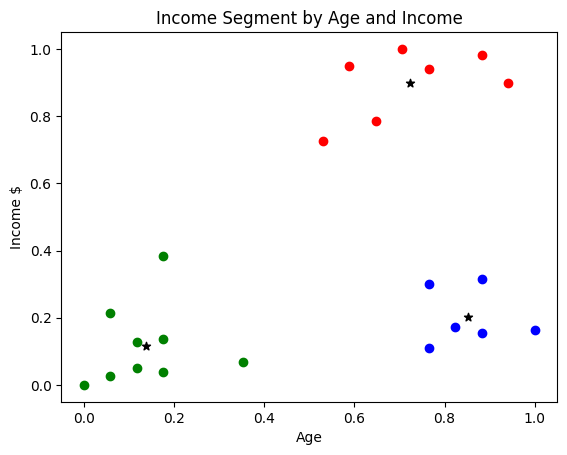

In [20]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1['Age'], df1['Income($)'], color = 'green')
plt.scatter(df2['Age'], df2['Income($)'], color = 'red')
plt.scatter(df3['Age'], df3['Income($)'], color = 'blue')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], marker = '*', color = 'black')
plt.xlabel('Age')
plt.ylabel('Income $')
plt.title('Income Segment by Age and Income')
plt.show()

The visualisation is well clustered now

### **Elbow Method for Optimal Clusters**

In [21]:
k_range = range(1,10)
sse = []

for k in k_range:
  km = KMeans(n_clusters = k)
  km.fit(df[['Age', 'Income($)']])
  sse.append(km.inertia_)

In [22]:
sse

[5.434011511988179,
 2.4571335359046356,
 0.4750783498553097,
 0.40365551195705296,
 0.3417597180720834,
 0.22589089371465979,
 0.17840674931327935,
 0.15386320999546688,
 0.1204519443835683]

Text(0.5, 1.0, 'Elbow Technique')

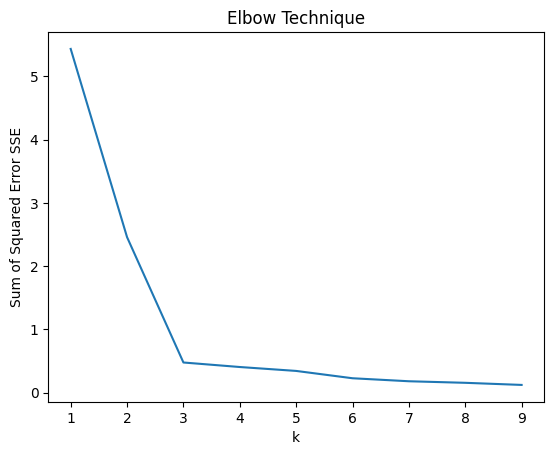

In [23]:
plt.plot(k_range, sse)
plt.xlabel('k')
plt.ylabel('Sum of Squared Error SSE')
plt.title('Elbow Technique')